# Homework 6 - Enis Becirbegovic

***Breadth-first search***  

In this exercise, we will begin to explore the concept of hashing and how it related to various object
containers with respect to computational complexity. We will begin with the base code for as described
in Chapter 5 of Grokking Algorithms (Bhargava 2016).

In [137]:
from names import Name_US
import random
import string
from collections import deque
import time
import copy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [ ]:
letters = string.ascii_lowercase
r_string =  ''.join(random.choice(letters) for i in range(50)) 
 
def list_of_random_string(size ):
    l = []
    i = 1
    while len(l) < size:
        random.seed(i)
        r_string = ''.join(random.choice(letters) for i in range(10))
        if r_string not in l:    
            l.append(r_string)
        i +=1 
    return l


In [ ]:
from collections import OrderedDict
# https://stackoverflow.com/questions/18809482/python-nesting-dictionary-ordereddict-from-collections
class MyOrderedDict(OrderedDict):
    def __missing__(self, key):
        val = self[key] = MyOrderedDict()
        return val

In [ ]:
def person_name_match(person,name):
      return person == name

In [ ]:
def search(search_name):
    search_queue = deque()
    search_queue += graph['me']
#     print("Adding to search queue:", search_queue)

    # This array is how you keep track of which people you've searched before.
    searched = []
    
    cnt=1
    while search_queue:

#         print("search_queue now looks like this:", search_queue)

        person = search_queue.popleft()
        # Only search this person if you haven't already searched them.
        if person not in searched:

#             print("Searching", person)

            if person_name_match(person,search_name):
#                 print(person + " is a mango seller!")
                print("Loops need to find  person '{}':  ".format(search_name), cnt)
                return True
            else:
                search_queue += graph[person]
#                 print("  ", person, "is NOT a mango seller!\n   Adding to search queue:", graph[person])
                
                # Marks this person as searched
                searched.append(person)
#                 print("Finished searching", person, ". Adding to searched list:", searched)
        cnt +=1
    return False
 

# 1.
Create a five level 'connections' graph (all unique, no duplicates).
* The first level should have five people and each person in first level should have five connections (they can be exclusive to one person or shared with other members on the same level, but all five should be unique, no duplicates)
* Each person in the second level should have five connections (they can be exclusive to one person or shared with other members on the same level, but all five should be unique, no duplicates)
* Continue the same for third, fourth, and fifth levels
* There should be no reverse connections (i.e. first level can connect to second level but second cannot have any reverse connection with the first, and so on for 3rd, 4th, and 5th levels)

In [204]:
names = Name_US()
unique_names_orig = set(names.first_names_female  + names.first_names_male + names.last_names )
unique_string_orig =  set(list_of_random_string(40000))

In [238]:
random.seed(1)
unique_names = copy.deepcopy(unique_names_orig)
unique_string = copy.deepcopy(unique_string_orig)

graph =  MyOrderedDict()
all_names = []

In [239]:
#Create first level 

first_level =random.sample(unique_names,k=5)
_ = [unique_names.remove(e) for e in element]
    
graph['me'] = first_level

In [240]:
#Create second level 

for person_first_level in graph['me']:
    second_level =random.sample(unique_names,k=5)
    _ = [unique_names.remove(e) for e in second_level]
    graph[person_first_level]=second_level

In [233]:
#Create third level 
for person_first_level in graph['me']:    
    for person_second_level in graph[person_first_level]:
        third_level =random.sample(unique_names,k=5)
        _ = [unique_names.remove(e) for e in third_level]
        graph[person_second_level]=third_level
 

In [234]:
#Create fourth level   
for person_first_level in graph['me']:    
    for person_second_level in graph[person_first_level]:
         for person_third_level in graph[person_second_level]:
            fourth_level =random.sample(unique_names,k=5)
            _ = [unique_names.remove(e) for e in fourth_level]
            graph[person_third_level]=fourth_level

In [235]:
#Create fifth level 

for person_first_level in graph['me']:    
    for person_second_level in graph[person_first_level]:
         for person_third_level in graph[person_second_level]:
                 for person_fourth_level in graph[person_third_level]:
                    fifth_level =random.sample(unique_names,k=5)
                    _ = [unique_names.remove(e) for e in fifth_level]
                    graph[person_fourth_level]=fifth_level

In [236]:
#Create sixth level 


for person_first_level in graph['me']:    
    for person_second_level in graph[person_first_level]:
         for person_third_level in graph[person_second_level]:
                 for person_fourth_level in graph[person_third_level]:
                         for person_fifth_level in graph[person_fourth_level]:
                            sixth_level =random.sample(unique_string,k=5)
                            _ = [unique_string.remove(e) for e in sixth_level]
                            graph[person_fifth_level]=sixth_level
                            

In [237]:
   
first_level = []
second_level =[] 
third_level =[]
fourth_level = []
fifth_level = []
sixth_level = []
for person_first_level in graph['me']:    
    first_level.append(person_first_level)
    for person_second_level in graph[person_first_level]:
        second_level.append(person_second_level)
        for person_third_level in graph[person_second_level]:
            third_level.append(person_third_level)
            for person_fourth_level in graph[person_third_level]:
                fourth_level.append(person_fourth_level)
                for person_fifth_level in graph[person_fourth_level]:
                    fifth_level.append(person_fifth_level)
                    for person_sixth_level in graph[person_fifth_level]:
                        sixth_level.append(person_sixth_level)
print(len(first_level))
print(len(second_level))
print(len(third_level))
print(len(fourth_level)) 
print(len(fifth_level))
print(len(sixth_level))

5
25
100
500
2500
12500


## Discussion

The most challenging part of the exercise is to create names at each level to ensure we do not have duplicate names.   I complete this at each level by first create members of the first-level, second-level, and so on. After this was completed the persons at each level were stored in a list for use in the following section. 

# 2.

Now search for three people on each level and capture the time for each search


In [227]:
search_names_1st = first_level[-3:]
search_names_2nd = second_level[-3:]
search_names_3rd =  third_level [-3:]
search_names_4th =  fourth_level [-3:]
search_names_5th =  fifth_level [-3:]

In [228]:
times_1st = []
times_2nd = []
times_3rd = []
times_4th = []
times_5th = []

for name in search_names_1st: 
    start = time.perf_counter()
    search(name)
    end = time.perf_counter()
    times_1st.append(end-start)
    
for name in search_names_2nd:    
    start = time.perf_counter()
    search(name)
    end = time.perf_counter()
    times_2nd.append(end-start)
    
for name in search_names_3rd:    
    start = time.perf_counter()
    search(name)
    end = time.perf_counter()
    times_3rd.append(end-start)
    
for name in search_names_4th:    
    start = time.perf_counter()
    search(name)
    end = time.perf_counter()
    times_4th.append(end-start)
    
for name in search_names_5th:    
    start = time.perf_counter()
    search(name)
    end = time.perf_counter()
    times_5th.append(end-start)

Loops need to find  person 'Giovanna':   3
Loops need to find  person 'Aryanna':   4
Loops need to find  person 'Primus':   5
Loops need to find  person 'Reynolds':   28
Loops need to find  person 'Fernanda':   29
Loops need to find  person 'Kizzy':   30
Loops need to find  person 'Amon':   128
Loops need to find  person 'Simona':   129
Loops need to find  person 'Maverick':   130
Loops need to find  person 'Arla':   628
Loops need to find  person 'Feest':   629
Loops need to find  person 'Garett':   630
Loops need to find  person 'Xavier':   3128
Loops need to find  person 'Keri':   3129
Loops need to find  person 'Harlow':   3130


## Discussion

In the section we search for each name at each level. We also print the position where each was found.

# 3.
Organize the results of the study into an table showing the 'name' that you searched for, the level of
the search (first, second, third, fourth, fifth), and the time it took. Discuss any findings.

In [194]:
all_positions = [3,4,5,28,29,30,153,154,155,653,654,655,3148,3149,3150]
all_searched_names = search_names_1st +  search_names_2nd  +search_names_3rd + search_names_4th+ search_names_5th

all_levels = []
for i in range(1,6):
    all_levels = all_levels + [i]*3 
all_times = times_1st + times_2nd + times_3rd + times_4th + times_5th

In [195]:
results  = pd.DataFrame([all_positions, all_searched_names,all_levels,all_times]).T

results.columns = ['positions', 'names','levels','times']
results[['levels','positions','times']] = results[['levels','positions','times']].astype(float)
results

,positions,names,levels,times
0,3.0,Giovanna,1.0,0.000142
1,4.0,Aryanna,1.0,0.000083
2,5.0,Primus,1.0,0.000070
3,28.0,Reynolds,2.0,0.000133
4,29.0,Fernanda,2.0,0.000110
5,30.0,Kizzy,2.0,0.000165
6,153.0,Amon,3.0,0.000614
7,154.0,Simona,3.0,0.000979
8,155.0,Maverick,3.0,0.000476
9,653.0,Arla,4.0,0.008300


## Discussion

The search time increases as expected.  We can also observe that the position of the last element at each level is approximately 5x the distance of the of the position of the last elements at the previous level (as expected).

# 4.

Using the average time for each level, create a plot and compare times at each level (five bars or
any other suitable visual). Discuss any findings.

In [196]:
results_avg = results[['levels','positions','times']].astype(float).groupby(['levels']) .mean()
results_avg

,positions,times
levels,,
1.0,4.0,0.000098
2.0,29.0,0.000136
3.0,154.0,0.000690
4.0,654.0,0.007530
5.0,3149.0,0.097162


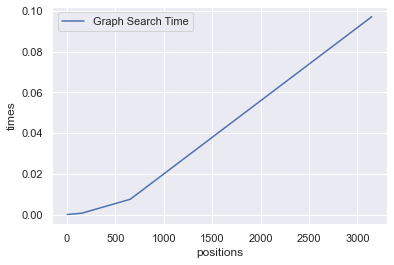

In [197]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

sns.lineplot(data=results_avg, x="positions", y="times",label='Graph Search Time') 

## Big O simulated times

In [161]:
simulated_time = []
num_edges = []
for edge in range(100,10000,100):
    num_edges.append(edge)
    simulated_time_temp = edge + 5*edge 
    simulated_time.append(simulated_time_temp)
    
sim_results = pd.DataFrame([num_edges, simulated_time]).T
sim_results.columns= ['edges', 'time']

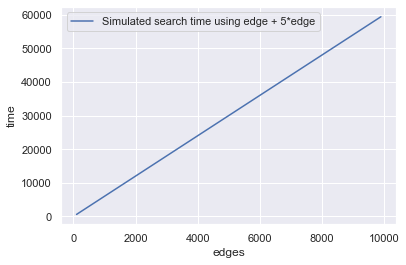

In [245]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
 
sns.lineplot(data=sim_results, x="edges", y="time",label='Simulated search time using edge + 5*edge') 


## Discussion

The two graphs above show actual and simulated search times. This alow us to compare the results and shape of these graphs when stacked against one and the other. The discussion and the meaning are provided in the executive summary. 

# Executive Summary 


In this exercise, we explored graph data structures and search times using ***Breadth-first Search*** algorithm needed to search the graph. The graph we create consisted ***entirely*** of unique names, and in this exercise the graph did not have the reverse connections (all edges are one-directional). The steps in this  exercise consisted of:

1. Create a graph with 5 levels. We start with 5 nodes at the first level and add 5 people to each node at each subsequent level. For this exercise, I created a list of fake names borrowing from Faker python package. As each name was created as a node it was removed from the sample of names list to ensure we have unique names in the graph.   
2. Search for the (last) three people from each level in the ordered they were added. The last three members were chosen to simulate the worst case of Big O. 
3. Organize the results in the table
4. Graph the results  

Creating the graph data structure was the most challenging part of this exercise. I used the ordered dictionary (OrderedDict) adjusted for my need as a data structure for the graph. Ordered List preserves the order of addition (unlike regular dict) which allows you to track the progress and ensure accuracy. We start the creation of the graph by adding 5 elements to the topmost node ('me'). We then move to the first, second, third, fourth, and fifth levels until each node has 5 people each. At each level the number of people increases by ~5x  the previous level:

1. 5
2. 25
3. 100
4. 500
5. 2500
6. 12500

For the search part of the exercise I modified the ***person_name_match*** to return true when the search name matches the person. I also added a counter in the search to measure the number of loops it takes to find each person. For each level, I choose to search for 3 people that were added last. 

When we plot the average results of search times we get the following graph shape:

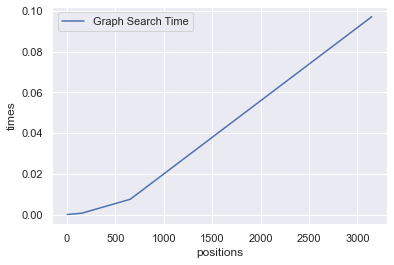

Big O for graph search has the worst case as O(V+E) where V is the number of vertices (or connections) and E is the number of edges. Because we are searching the entire graph for a person, it takes O(1) to add each person to a queue (since we are tracking people we search), and we also need to search all edges in the worst case. That is why we have an additive aspect in the Big O notation. If we plot the ***simulated***  search times (these are not the actual search times) the graph would look like this:       

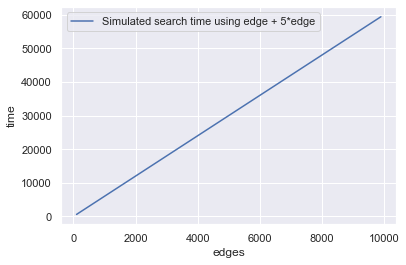

The simulate plot (above) indicates that simulated big O is purely linear. The actual search time plot shows also linear search times. This indicated that Big O for Breadth-first search is linear and our search results are exactly within expectations.